## Setup and Import Libraries

In [1]:
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

In [2]:
_ = load_dotenv(find_dotenv())

In [3]:
client = OpenAI()

## Creating File

In [4]:
filename = "exercise_sales_data.csv"

In [5]:
file = client.files.create(
    file=open(file=filename, mode='rb'),
    purpose='assistants'
)

In [6]:
file.id

'file-H7SWSpHQEn5FLMEca58Pv4'

In [7]:
file

FileObject(id='file-H7SWSpHQEn5FLMEca58Pv4', bytes=6745, created_at=1742310420, filename='exercise_sales_data.csv', object='file', purpose='assistants', status='processed', expires_at=None, status_details=None)

In [8]:
for file in client.files.list():
    print(file.id, file.filename)

file-H7SWSpHQEn5FLMEca58Pv4 exercise_sales_data.csv


## Creating Assistant

In [12]:
assistant = client.beta.assistants.create(
    name='Sales Data Visualizer',
    instructions='You use code and files to help visualize sales data',
    model='gpt-3.5-turbo',
    tools=[{'type':'file_search'}, {'type':'code_interpreter'}]
)

## Creating Thread and Message

In [13]:
thread = client.beta.threads.create()

In [14]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Create a bar plot of total sum of Purchase Price expenditure per year?',
    attachments=[{"file_id": file.id, "tools": [{'type':'code_interpreter'}]}]
)

## Create Run

In [15]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id
)

In [16]:
run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id,
)

In [17]:
run.status

'in_progress'

## Display Response

In [18]:
messages = client.beta.threads.messages.list(
    thread_id=thread.id,
    order='asc'
)

In [19]:
for message in messages:
    print(message)
    print("\n")

Message(id='msg_t0zUBaxQeGLYbMcISQItGKwS', assistant_id=None, attachments=[Attachment(file_id='file-H7SWSpHQEn5FLMEca58Pv4', tools=[CodeInterpreterTool(type='code_interpreter')])], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Create a bar plot of total sum of Purchase Price expenditure per year?'), type='text')], created_at=1742310651, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_Z27PPuMFMQHlVI7QqowZlWLr')


Message(id='msg_iqmq1sZ7eKv1XEvPsMxU6xmq', assistant_id='asst_y3DB8FG3jk1p20nUajck1T0t', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="The data contains information about sales, including the purchase price and the timestamp of the purchase.\n\nI will now create a bar plot showing the total sum of Purchase Price expenditure per year. Let's proceed with generating the plot."), type='text')], created_at=1742310

## Retrieve Single Message

In [20]:
single_message = client.beta.threads.messages.retrieve(
    message_id='msg_u51bKzGNfyDM1YIBuIv97iHm',
    thread_id='thread_Z27PPuMFMQHlVI7QqowZlWLr'
)

In [21]:
single_message.content

[ImageFileContentBlock(image_file=ImageFile(file_id='file-E2y65Yb28QQYvVkuZrbugt', detail=None), type='image_file'),
 TextContentBlock(text=Text(annotations=[], value='Here is the bar plot showing the total sum of Purchase Price expenditure per year based on the data provided. Each bar represents the total expenditure for a specific year.'), type='text')]

In [22]:
single_message.content[0]

ImageFileContentBlock(image_file=ImageFile(file_id='file-E2y65Yb28QQYvVkuZrbugt', detail=None), type='image_file')

In [23]:
single_message.content[1].text.value

'Here is the bar plot showing the total sum of Purchase Price expenditure per year based on the data provided. Each bar represents the total expenditure for a specific year.'

In [24]:
myfile = client.files.content(file_id='file-E2y65Yb28QQYvVkuZrbugt')

In [25]:
with open('sales_data.png', 'wb') as file:
    file.write(myfile.content)

## Displaying Image

In [26]:
from IPython.display import Image

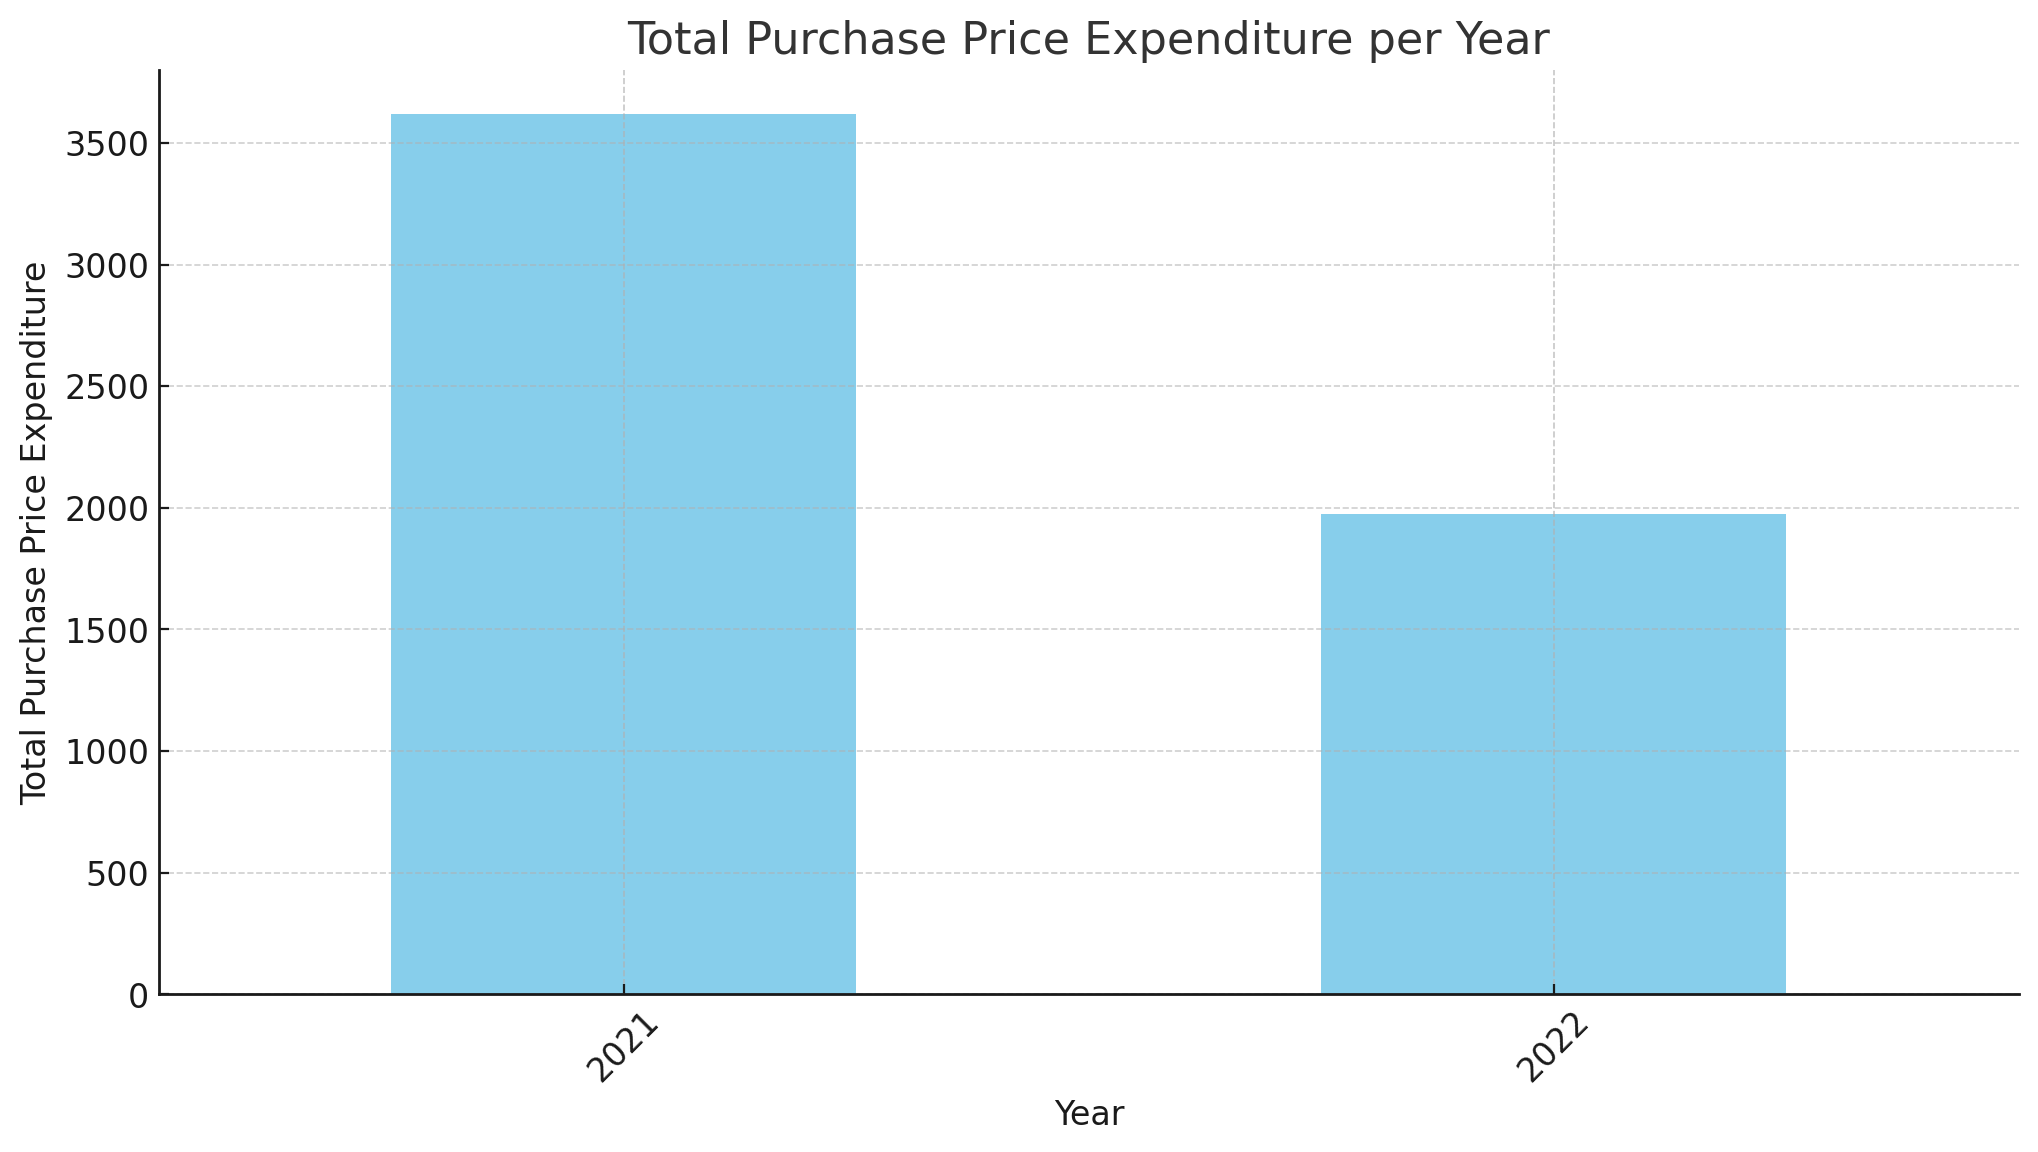

In [27]:
Image(filename='sales_data.png')

## Delete Assistant

In [28]:
response = client.beta.assistants.delete(
    assistant_id=assistant.id
)

In [29]:
response

AssistantDeleted(id='asst_y3DB8FG3jk1p20nUajck1T0t', deleted=True, object='assistant.deleted')

## Delete Files

In [30]:
files = client.files.list()

In [31]:
files

SyncCursorPage[FileObject](data=[FileObject(id='file-E2y65Yb28QQYvVkuZrbugt', bytes=78106, created_at=1742310666, filename='0473b9ca-66ac-4ca2-bb8c-6b527d3dfaeb', object='file', purpose='assistants_output', status='processed', expires_at=None, status_details=None), FileObject(id='file-H7SWSpHQEn5FLMEca58Pv4', bytes=6745, created_at=1742310420, filename='exercise_sales_data.csv', object='file', purpose='assistants', status='processed', expires_at=None, status_details=None)], has_more=False, object='list', first_id='file-E2y65Yb28QQYvVkuZrbugt', last_id='file-H7SWSpHQEn5FLMEca58Pv4')

In [32]:
for file in files.data:
    print(f"File ID: {file.id} | Filename: {file.filename}")
    response = client.files.delete(file.id)
    print(f"Deleted: {file.id}, Response: {response}")

File ID: file-E2y65Yb28QQYvVkuZrbugt | Filename: 0473b9ca-66ac-4ca2-bb8c-6b527d3dfaeb
Deleted: file-E2y65Yb28QQYvVkuZrbugt, Response: FileDeleted(id='file-E2y65Yb28QQYvVkuZrbugt', deleted=True, object='file')
File ID: file-H7SWSpHQEn5FLMEca58Pv4 | Filename: exercise_sales_data.csv
Deleted: file-H7SWSpHQEn5FLMEca58Pv4, Response: FileDeleted(id='file-H7SWSpHQEn5FLMEca58Pv4', deleted=True, object='file')
